In [1]:
# now, this is the gas-ex plots for the revised paper version, 
# building partly on MASTER_gasex_tests which was used for the original submission

In [2]:
# this is for MPI-SOM-FFN and CarboScope based on the ideal (bgcArgo) sampling case
# plus model tests with changing gas transfer velocity and recalculated gas-ex from model pCO2 fields


# a couple of typical settings just in case they may be useful here, too

# tests with fesom on daily vs monthly gas-ex calculation are found in 
# /home/ollie/jhauck/py_recom/GlobalAssessment/MASTER_gasex_tests_v2.ipynb


%autosave 10

import sys
import os
sys.path.append('../')

import pandas
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
#import gcb_iav
from annualmean import annualmean
from integrate_CO2flux import integrate_CO2flux
#from regional_average_pCO2 import reg_ave_pCO2  # this one doesn't work (total area is calculated also where there is no data, hence means become too small)

from matplotlib.pyplot import cm
from numpy import genfromtxt #loadtxt
from matplotlib.ticker import MultipleLocator
import seawater as sw
import scipy.signal

import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



import calendar
import matplotlib.patches as mpatches


# experiments:
# A, B, C

# A: SOCAT only
# B: SOCAT+SOCCOM
# C: ARGO


# Rödenbeck: 1958 - 2019
# Landschützer: 1982 - 2018 (?, 444 monthly entries)


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title





Autosaving every 10 seconds
[NbConvertApp] Converting notebook annualmean.ipynb to python
[NbConvertApp] Writing 2130 bytes to annualmean.py
[NbConvertApp] Converting notebook integrate_CO2flux.ipynb to python
[NbConvertApp] Writing 5022 bytes to integrate_CO2flux.py


In [3]:
firstyear=1958
lastyear=2020 # always one more than actually analysed

#define time range for nc data 
gcb_time = np.arange(firstyear,lastyear-1./24,step=1./12)
tsteps = (lastyear-firstyear)*12
gcb_years = np.arange(firstyear,lastyear)



ind1 = 24*12      # start index, monthly time-series, 1982
ind2 = 61*12   # end index, monthly time-series, end 2018

ind = np.where((gcb_years>=2009) & (gcb_years<=2018))

print(tsteps)

#-----------------------------------------------------------
# for shorter model run:
firstyear2=1981
lastyear2=2020 # always one more than actually analysed
#define time range for nc data 
gcb_time2 = np.arange(firstyear2,lastyear2-1./24,step=1./12)
tsteps2 = (lastyear2-firstyear2)*12
gcb_years2 = np.arange(firstyear2,lastyear2)

#-----------------------------------------------------------
# for area-integration:

xax = np.arange(0.5,360.5,1)
yax = np.arange(-89.5,90.5,1)

nx=len(xax)
ny=len(yax)

xi = np.arange(-180,181,1) #longitude
yi = np.arange(-90,91,1) #latitude
Aarea = np.zeros((len(xi)-1,len(yi)-1))

yax2=yax[np.newaxis,:,np.newaxis]
YY = np.tile(yax2,(tsteps,1,nx))

#calculate area
for i in range(0,len(xi)-1): #laenge pruefen!
    for j in range(0,len(yi)-1): #laenge pruefen!
       #sw_dist aus matlab umsetzen
       dist1 = sw.dist([yi[j],yi[j+1]],[xi[i],xi[i]])
       dist2 = sw.dist([yi[j],yi[j]],[xi[i],xi[i+1]])
       Aarea[i][j] = float(dist1[0]) * float(dist2[0]) *1000 *1000 #m2
#flachen ueberall gleich gross?
Aarea = Aarea.transpose()    

areaT = np.tile(Aarea,(tsteps,1,1))
areaT2 = np.tile(Aarea,(tsteps2,1,1))

print(np.shape(areaT2))

# load reccap regions mask:

regions = Dataset('/work/ollie/jhauck/reccap/RECCAP2-shared-resources/data/regions/RECCAP2_region_masks_all.nc',mode='r')
reg_lon = regions['lon'][:]
reg_lat = regions['lat'][:]
reg_arc = regions['arctic'][:]
reg_arc[reg_arc>0]=1
reg_arcT = np.tile(reg_arc,(tsteps,1,1))

744
(468, 180, 360)


(744, 180, 360)


/work/ollie/jhauck/gcp2018/py_recom/GCB/code/2021/subsampling/integrate_CO2flux.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad('white',1.)


shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


/work/ollie/jhauck/gcp2018/py_recom/GCB/code/2021/subsampling/integrate_CO2flux.py:116: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(reg_lon,reg_lat,np.squeeze(mask[1,:,:]))#, vmin=-60, vmax=750)


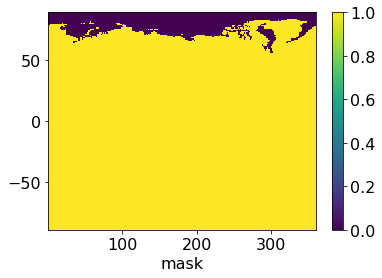

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- 

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


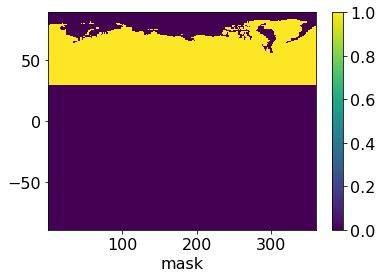

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- --

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


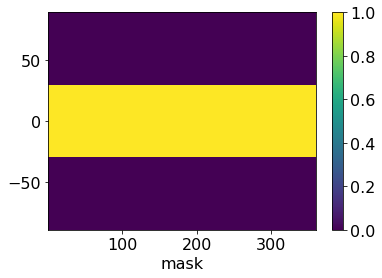

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- -- -- --

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


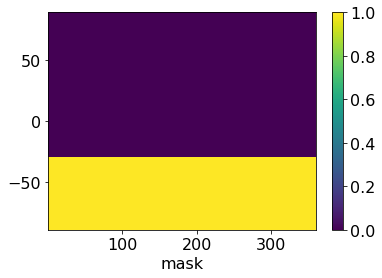

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- -- -- --

shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


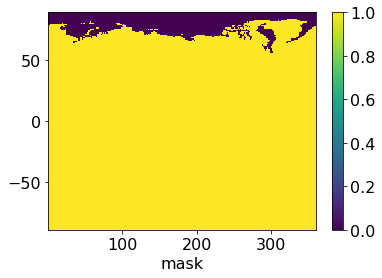

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- 

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


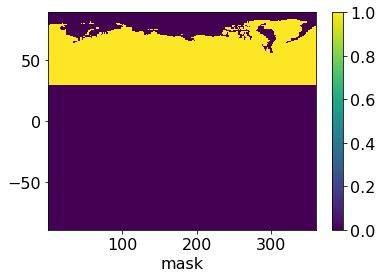

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- --

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


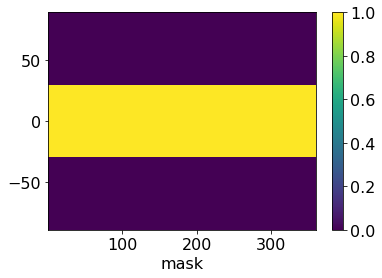

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- -- -- --

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


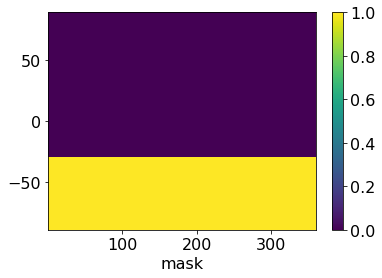

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-- -- -- -- -- -- -- -- -- -- -- --]
1 [-- -- -- -- -- -- -- -- -- -- -- --]
2 [-- -- -- -- -- -- -- -- -- -- -- --]
3 [-- -- -- -- -- -- -- -- -- -- -- --]
4 [-- -- -- -- -- -- -- -- -- -- -- --]
5 [-- -- -- -- -- -- -- -- -- -- -- --]
6 [-- -- -- -- -- -- -- -- -- -- -- --]
7 [-- -- -- -- -- -- -- -- -- -- -- --]
8 [-- -- -- -- -- -- -- -- -- -- -- --]
9 [-- -- -- -- -- -- -- -- -- -- -- --]
10 [-- -- -- -- -- -- -- -- -- -- -- --]
11 [-- -- -- -- -- -- -- -- -- -- -- --]
12 [-- -- -- -- -- -- -- -- -- -- -- --]
13 [-- -- -- -- -- -- -- -- -- -- -- --]
14 [-- -- -- -- -- -- -- -- -- -- -- --]
15 [-- -- -- -- -- -- -- -- -- -- -- --]
16 [-- -- -- -- -- -- -- -- -- -- -- --]
17 [-- -- -- -- -- -- -- -- -- -- -- --]
18 [-- -- -- -- -- -- -- -- -- -- -- --]
19 [-- -- -- -- -- -- -- -- -- -- -- --]
20 [-- -- -- -- -- -- -- -- -- -- -- --]
21 [-- -- -- -- -- -- -- -- -- -- -- --]
22 [-- -- -- -- -- -- -- -- -- -- --

In [4]:
# load MPI-SOM-FFN fields with native and fesom gas-ex
# only from ideal grid

# MPI-SOM-FFN:


land_fgco2_1x1_C_fesomkw = np.nan * np.zeros((tsteps,180,360))
tmp1 = np.load('land_fgco2_1x1_C_fesom_kw_subsampling.npy')
land_fgco2_1x1_C_fesomkw[ind1:ind2,:,:] = tmp1

land_fgco2_1x1_C_nativekw = np.nan * np.zeros((tsteps,180,360))
tmp1 = np.load('land_fgco2_1x1_C_subsampling.npy')
land_fgco2_1x1_C_nativekw[ind1:ind2,:,:] = tmp1
#print(np.shape(tmp1))

print(np.shape(land_fgco2_1x1_C_nativekw))


#------------------------
# integrate time-series:
# fesomkw
land_fgco2_PgCyr_C_fesomkw_glo_noArc= integrate_CO2flux(land_fgco2_1x1_C_fesomkw,'glo_noArc',areaT,xax,yax)
land_fgco2_PgCyr_C_fesomkw_N_noArc= integrate_CO2flux(land_fgco2_1x1_C_fesomkw,'N_noArc',areaT,xax,yax)
land_fgco2_PgCyr_C_fesomkw_T= integrate_CO2flux(land_fgco2_1x1_C_fesomkw,'T',areaT,xax,yax)
land_fgco2_PgCyr_C_fesomkw_S= integrate_CO2flux(land_fgco2_1x1_C_fesomkw,'S',areaT,xax,yax)

land_fgco2_PgCyr_C_fesomkw_glo_noArc[(gcb_years<1982) | (gcb_years>2018)]=np.nan
land_fgco2_PgCyr_C_fesomkw_N_noArc[(gcb_years<1982) | (gcb_years>2018)]=np.nan
land_fgco2_PgCyr_C_fesomkw_T[(gcb_years<1982) | (gcb_years>2018)]=np.nan
land_fgco2_PgCyr_C_fesomkw_S[(gcb_years<1982) | (gcb_years>2018)]=np.nan

print(land_fgco2_PgCyr_C_fesomkw_glo_noArc)

# native kw
land_fgco2_PgCyr_C_nativekw_glo_noArc= integrate_CO2flux(land_fgco2_1x1_C_nativekw,'glo_noArc',areaT,xax,yax)
land_fgco2_PgCyr_C_nativekw_N_noArc= integrate_CO2flux(land_fgco2_1x1_C_nativekw,'N_noArc',areaT,xax,yax)
land_fgco2_PgCyr_C_nativekw_T= integrate_CO2flux(land_fgco2_1x1_C_nativekw,'T',areaT,xax,yax)
land_fgco2_PgCyr_C_nativekw_S= integrate_CO2flux(land_fgco2_1x1_C_nativekw,'S',areaT,xax,yax)

land_fgco2_PgCyr_C_nativekw_glo_noArc[(gcb_years<1982) | (gcb_years>2018)]=np.nan
land_fgco2_PgCyr_C_nativekw_N_noArc[(gcb_years<1982) | (gcb_years>2018)]=np.nan
land_fgco2_PgCyr_C_nativekw_T[(gcb_years<1982) | (gcb_years>2018)]=np.nan
land_fgco2_PgCyr_C_nativekw_S[(gcb_years<1982) | (gcb_years>2018)]=np.nan


# print:
print(land_fgco2_PgCyr_C_fesomkw_glo_noArc)
print(land_fgco2_PgCyr_C_nativekw_glo_noArc)

shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


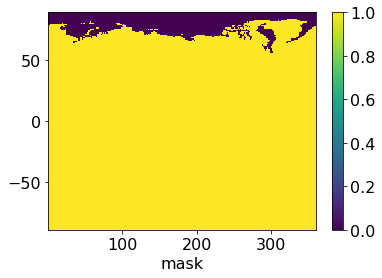

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.002516745360384 0.5307956203740369 0.5364305445063764
 0.7481639158408144 0.6958470441898236 0.7778961939947355
 0.8943945895865744 0.8256751230860678 0.7182147104524921
 1.069356408940102 1.2098358500068775 1.352371269790256]
1 [1.046779985913526 0.8171933074178274 0.8641377783478983
 0.8751939754752255 0.9147967127182189 1.125360226762582
 1.0940926306919083 0.9596195496099093 0.8597027918227435
 1.2068928970725343 1.6678368955280067 1.6414278918884087]
2 [1.2630106226600166 0.8815560081505949 0.8217108671489044
 1.038096247882612 1.1325397521561598 1.2181882894271923 1.254834628239143
 0.8927980364133979 0.9504405842445773 1.088305279129462
 1.4955351877977876 1.5746342817800973]
3 [1.1815869935656855 0.879708495053425 0.7788623404664982
 0.8507519029779087 0.8661210198913252 0.9757315481600793 1.02319638160175
 0.8350517757526974 0.7896661612256641 1.2084332917256504
 1.4304920064921465 1.511636994

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


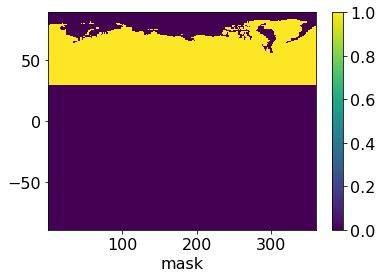

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.8764257448716548 1.8474470366306635 1.7650496240186195
 1.550703746541929 0.9816363529208907 0.356060441765668
 -0.15230674573396494 -0.44334222088627623 -0.3620738149750004
 0.17627710553998457 0.8358540294765838 1.4711581335632324]
1 [1.7968765666827293 1.907281644054534 1.930866325117777 1.568419808340093
 0.9918148373132906 0.44872031215816227 -0.11085352863583925
 -0.4132811780840086 -0.32812143681759626 0.26848015993961405
 1.021048905641948 1.5597283707848992]
2 [1.7381643970644516 1.8152872150593773 1.7635433070265936
 1.539630647336953 1.0678071084067158 0.45744848541321004
 -0.10843707967150511 -0.43038823165973433 -0.3243356333352716
 0.12544757216277705 0.9285835604402957 1.5522496996108852]
3 [1.8498475901705806 1.9663337638929543 1.870034412748235
 1.5589179582036063 1.027169714318712 0.37801261663848656
 -0.17433393056338986 -0.4263544988182018 -0.31297460525485676
 0.19510594947941653 0.8

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


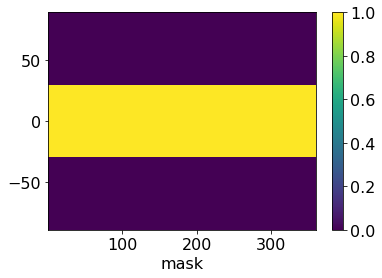

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.7180745673678121 -0.8313675421584072 -0.8139248096376247
 -0.851525608437307 -0.937273822912496 -0.7746812642118074
 -0.4660423027262973 -0.33671013606707184 -0.42343428910207254
 -0.5314822490634876 -0.6425140780502548 -0.6204769627301288]
1 [-0.636900686908922 -0.6154245881454291 -0.6620093681428005
 -0.7088522937420959 -0.6452784059215193 -0.42839784822965976
 -0.26281523701777376 -0.21156230237231474 -0.30683105174887426
 -0.47903739526342903 -0.5179055677752091 -0.5208646175379856]
2 [-0.45753612827648316 -0.4879846079871921 -0.5115005779648224
 -0.5635822189764855 -0.6379435715938686 -0.45303311203818164
 -0.1957387697462272 -0.1681194846334599 -0.2291100772268851
 -0.4127536009695627 -0.5372880342305562 -0.49926045250698603]
3 [-0.5173332233693703 -0.5979697507231446 -0.6349808596841148
 -0.6425863001124733 -0.6781116367600811 -0.5554711286128922
 -0.3021089229170556 -0.2691374000202229 -0.402931546755

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


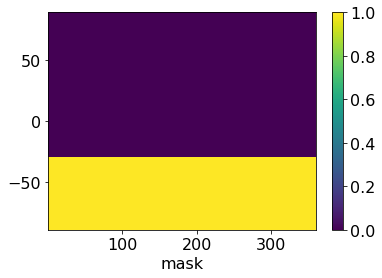

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.15583443214345893 -0.48528387409821905 -0.4146942698746184
 0.04898577773619239 0.6514845141814289 1.1965170164408752
 1.5127436380468366 1.6057274800394163 1.5037228145295651
 1.424561552463605 1.0164958985805486 0.5016900989571524]
1 [-0.11319589386028095 -0.4746637484912775 -0.4047191786270777
 0.015626460877228285 0.5682602813264478 1.1050377628340793
 1.4677613963455212 1.5844630300662326 1.4946552803892141
 1.4174501323963493 1.1646935576612678 0.602564138641495]
2 [-0.017617646127952236 -0.4457465989215906 -0.43033186191286726
 0.06204781952214453 0.7026762153433129 1.213772916052164
 1.5590104776568752 1.4913057527065923 1.5038862948067342
 1.3756113079362475 1.1042396615880476 0.5216450346761982]
3 [-0.150927373235525 -0.48865551811638464 -0.45619121259762196
 -0.0655797551132244 0.5170629423326945 1.153190060134485
 1.4996392350821954 1.530543674591122 1.5055723132360868 1.451452497440686
 1.0976384

shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


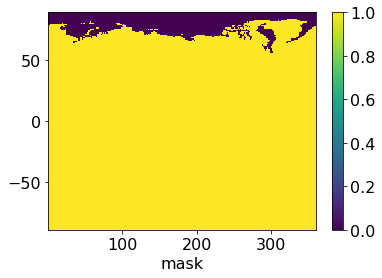

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.0779507165895241 0.5951067532335365 0.601698763893618
 0.8300563466165868 0.7563736624744581 0.8159556143735888
 0.9320593198047383 0.8486154891127227 0.7445320413513744
 1.1128779578676835 1.2603381878220383 1.4152438473919298]
1 [1.118032124797994 0.9006357795845186 0.953507860673318 0.9613712888459829
 0.9825913770092752 1.1750731126438105 1.1319860937528965
 0.9906502646249303 0.9023945068662048 1.2598032454876384
 1.727769480743713 1.7077615857898054]
2 [1.3409217304710728 0.9682433634459909 0.8990691262362365
 1.1039665303528192 1.1967150891346579 1.2549596490918458
 1.2888609251284255 0.931799983365001 0.9934831403591966
 1.1483445851247436 1.5568144922399798 1.6492416460613315]
3 [1.2515454280811318 0.949192809934179 0.8511812184487096
 0.9228913922379492 0.9302287558481629 1.0223130063015526
 1.0487654488248621 0.8651457509410075 0.8323246292665639
 1.2576161498215408 1.4785630568790233 1.5594

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


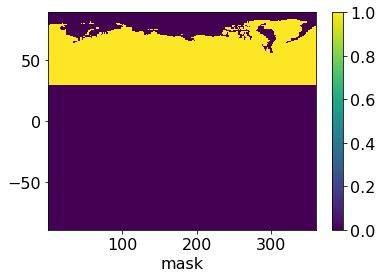

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.9208921799213987 1.8784883996906712 1.7938109770648198
 1.5839805380724459 1.0124642339211916 0.38101407215308014
 -0.13488533967387728 -0.4329294824044045 -0.3450529752530712
 0.20279607792751683 0.8673383790887618 1.5145153377364688]
1 [1.8414732621757497 1.9544759558774467 1.981209267904423
 1.6076726213893766 1.025112711771045 0.47823422112391967
 -0.08703769061985996 -0.39284784870905404 -0.30300791557472206
 0.3041872608915756 1.0633882095089304 1.6028196688061136]
2 [1.783804713776825 1.8623783810089924 1.8105047633669928
 1.5767411346619755 1.1005021914197128 0.48485120015242944
 -0.0841374881389488 -0.40878796543934387 -0.3000244316648393
 0.16095647174585132 0.9725424734233735 1.599315171791468]
3 [1.8957601327746159 2.005504549749996 1.905104486454675 1.5948820940098198
 1.059850983717372 0.399378048054373 -0.16012196174967247
 -0.413113485973038 -0.2952191168922132 0.22350054111109535
 0.9065

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


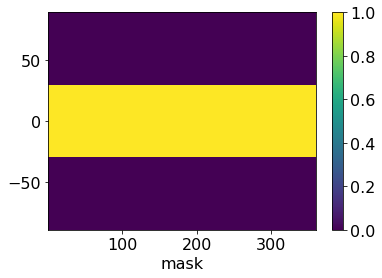

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.7008334166803948 -0.8151220557695399 -0.7924372885034626
 -0.8274977375053688 -0.9093292661906845 -0.7543658801657671
 -0.44819782171972194 -0.31599709611014704 -0.4044764201485414
 -0.5090151505506945 -0.6180033467780036 -0.5961041830544332]
1 [-0.6171728517160275 -0.5954554753954026 -0.639233778636547
 -0.6821288850461474 -0.6154385982513605 -0.40140711781304805
 -0.23794074712568844 -0.1917653782903739 -0.28715563949869977
 -0.4601403760936157 -0.497989194266854 -0.5014522114202167]
2 [-0.4355816265339428 -0.46674043095569434 -0.49763520264166067
 -0.5462732367391306 -0.6102273879616688 -0.4229873529246105
 -0.17386839241031787 -0.1474051869292969 -0.20884503250471348
 -0.39335920544641034 -0.5221003892499182 -0.4841202188011423]
3 [-0.5047686376222027 -0.5841622529249987 -0.6243585687098129
 -0.6253150229273713 -0.6519664249601395 -0.5278535796107511
 -0.2781844167375531 -0.2521362440184943 -0.38408087228

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


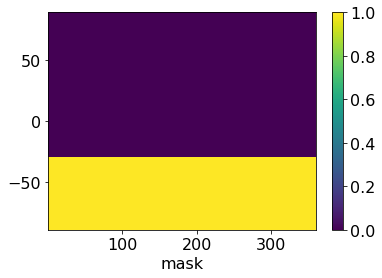

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.14210804665147955 -0.46825959068759476 -0.399674924667739
 0.07357354604950947 0.6532386947439514 1.1893074223862758
 1.5151424811983376 1.597542067627275 1.4940614367529872
 1.4190970304908612 1.0110031555112802 0.4968326927098942]
1 [-0.10626828566172775 -0.4583847008975256 -0.38846762859455825
 0.03582755250275413 0.5729172634895907 1.0982460093329391
 1.4569645314984447 1.575263491624358 1.4925580619396268
 1.4157563606896781 1.1623704655016367 0.6063941284039086]
2 [-0.007301356771809399 -0.4273945866073075 -0.4138004344890958
 0.07349863242997465 0.7064402856766138 1.193095801864027
 1.546866805677692 1.487993135733642 1.5023526045287487 1.3807473188253025
 1.1063724080665245 0.5340466930710057]
3 [-0.13944606707128132 -0.4721494868908179 -0.4295646992961526
 -0.04667567884449893 0.5223441970909306 1.1507885378579303
 1.4870718273120878 1.5303954809325397 1.5116246184461901
 1.4523005255106096 1.0923249

shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


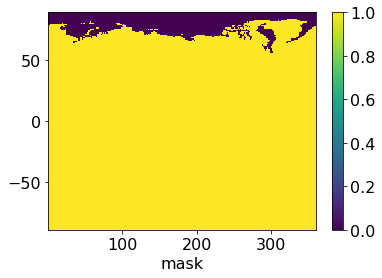

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.2832116549433743 0.6491808861830358 0.6763873014005469
 0.867861586521391 0.8475798985389452 0.8076099461601087
 0.9840319472074345 0.8743931045222327 0.6605295052051012
 1.2773701181893138 1.2762094420564822 1.6776272941375128]
1 [1.2481555695377196 1.0464361910963809 1.1098806625477842
 1.0503795376285527 1.0333130098546475 1.3145454216554993
 1.2170190807691201 1.1154465537056386 0.8273537618558761
 1.3237311794706976 1.9530119416399225 1.9460729211737589]
2 [1.572827951302835 1.0225136304503544 1.0294657875408835 1.242390978428631
 1.2668567954269838 1.298543326736917 1.556486897234745 0.7427460939201895
 1.1225125702937364 1.101169908879731 1.710128040149335 1.915697795582473]
3 [1.4463436721974825 1.1375029396363154 0.9159890041218981
 1.0449981982224397 0.925082299670703 1.1465007766969995
 1.1153685165242826 0.9606808524077172 0.7673629166119483
 1.3784623022095888 1.4997556065384186 1.85524484

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


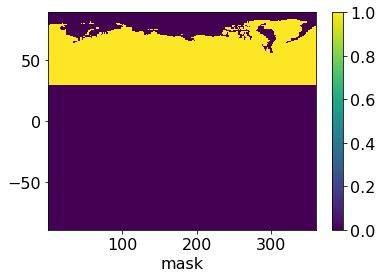

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [2.2996883071013734 2.1915004000730853 2.0805839989906127
 1.8200123859367432 1.1593747950561546 0.40765955637571966
 -0.1747461549013479 -0.5035859732600827 -0.40064619081640435
 0.21984121478665097 0.9706344488210544 1.7848481200608497]
1 [2.1481392743999854 2.279973465808878 2.3528962216215095 1.839371928115135
 1.1281830543933915 0.5680740413434757 -0.11544577337424201
 -0.4501193365747521 -0.3792013492570155 0.3340189035707984
 1.2185535680312074 1.8770451878849395]
2 [2.0659586430713275 2.1609416988136965 2.091355812457001
 1.8263816635283054 1.2215594795767404 0.5309086381902174
 -0.11305847036489111 -0.5174366761856704 -0.3269925847661032
 0.12499455283142497 1.1072669676533369 1.8711638079961077]
3 [2.2339061371971494 2.368662256721989 2.2169022167657553
 1.8367715335409331 1.2124778654228143 0.45159365398150786
 -0.21191395861111678 -0.45305028273377135 -0.33941058403203556
 0.22916372750999367 0.

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


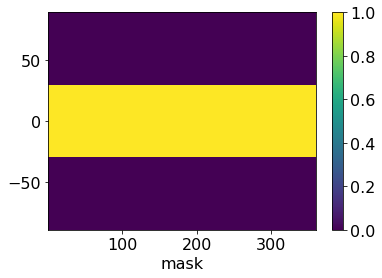

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.8235886691592154 -1.0023597636319934 -0.9009786668896235
 -0.9781035588833067 -1.066551608069085 -0.9451578285759892
 -0.5311058748461449 -0.37617872657924345 -0.5118978518553324
 -0.5634975933814794 -0.7624994881425975 -0.6903665843644972]
1 [-0.7695919297510962 -0.6675506072199304 -0.7572475883531901
 -0.8065218512899128 -0.7495999730617465 -0.45632043732948974
 -0.31925751074200115 -0.22323396080448743 -0.3390076611097188
 -0.566271612010538 -0.5540077949616907 -0.6194350337245643]
2 [-0.5050669960603589 -0.5879370542138087 -0.5566713483678506
 -0.6350920004470935 -0.7174423615124703 -0.5542129276620537
 -0.1885228404994869 -0.23454938950327384 -0.22773615491915616
 -0.47172114274609755 -0.6197704514921304 -0.5606512498883681]
3 [-0.6050632650577679 -0.6835313165144902 -0.73750960733598
 -0.7018370066620838 -0.7753573484268174 -0.681290078997494
 -0.3267445423072862 -0.28690128918198315 -0.5046092573356327

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


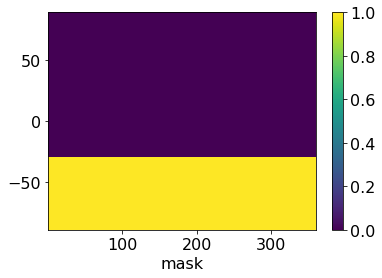

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.19288798299878362 -0.5399597502580559 -0.503218030700442
 0.025952759467954886 0.7547567115518757 1.3451082183603784
 1.6898839769549274 1.754157804361559 1.5730735478768378
 1.6210264967841423 1.0680744813780252 0.5831457584411602]
1 [-0.13039177511116945 -0.565986667492567 -0.48576797072053496
 0.017529460803330104 0.6547299285230025 1.202791817641513
 1.6517223648853634 1.7887998510848782 1.5455627722226106
 1.555983887910437 1.2884661685704057 0.6884627670133839]
2 [0.011936304291866253 -0.5504910141495333 -0.5052186765482666
 0.051101315347419046 0.7627396773627136 1.3218476162087536
 1.8580682080991229 1.494732159609134 1.677241309978996 1.4478964987944039
 1.2226315239881285 0.6051852374747336]
3 [-0.18249919994189892 -0.5476280005711837 -0.5634036053078769
 -0.08993632865641 0.4879617826747061 1.3761972017129858
 1.6540270174426857 1.7006324243234716 1.6113827579796163
 1.6123583014711287 1.1499097388

In [5]:
# load Rödenbeck, 
# 1) ocim prior fesomkw
# 2) fesom prior fesom kw
# 3) fesom prior native kw


tmp = np.load('roedenSc_fgco2_1x1_C_subsampling.npy')
roeden_fgco2_1x1_C_ocimprior_fesomkw = np.copy(tmp[0:tsteps,:,:])

tmp = np.load('roedenSc_FESOMprior_fgco2_1x1_C_subsampling.npy')
roeden_fgco2_1x1_C_fesomprior_fesomkw = np.copy(tmp[0:tsteps,:,:])

tmp = np.load('roedenSc_FESOMprior_native_gasex_fgco2_1x1_C_subsampling.npy')
roeden_fgco2_1x1_C_fesomprior_nativekw = np.copy(tmp[0:tsteps,:,:])

# integrate

#ocim prior fesom kw
roeden_fgco2_PgCyr_C_ocimprior_fesomkw_glo_noArc= integrate_CO2flux(roeden_fgco2_1x1_C_ocimprior_fesomkw,'glo_noArc',areaT,xax,yax)
roeden_fgco2_PgCyr_C_ocimprior_fesomkw_N_noArc= integrate_CO2flux(roeden_fgco2_1x1_C_ocimprior_fesomkw,'N_noArc',areaT,xax,yax)
roeden_fgco2_PgCyr_C_ocimprior_fesomkw_T= integrate_CO2flux(roeden_fgco2_1x1_C_ocimprior_fesomkw,'T',areaT,xax,yax)
roeden_fgco2_PgCyr_C_ocimprior_fesomkw_S= integrate_CO2flux(roeden_fgco2_1x1_C_ocimprior_fesomkw,'S',areaT,xax,yax)

#fesom prior fesom kw
roeden_fgco2_PgCyr_C_fesomprior_fesomkw_glo_noArc= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_fesomkw,'glo_noArc',areaT,xax,yax)
roeden_fgco2_PgCyr_C_fesomprior_fesomkw_N_noArc= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_fesomkw,'N_noArc',areaT,xax,yax)
roeden_fgco2_PgCyr_C_fesomprior_fesomkw_T= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_fesomkw,'T',areaT,xax,yax)
roeden_fgco2_PgCyr_C_fesomprior_fesomkw_S= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_fesomkw,'S',areaT,xax,yax)

#fesom prior native kw
roeden_fgco2_PgCyr_C_fesomprior_nativekw_glo_noArc= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_nativekw,'glo_noArc',areaT,xax,yax)
roeden_fgco2_PgCyr_C_fesomprior_nativekw_N_noArc= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_nativekw,'N_noArc',areaT,xax,yax)
roeden_fgco2_PgCyr_C_fesomprior_nativekw_T= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_nativekw,'T',areaT,xax,yax)
roeden_fgco2_PgCyr_C_fesomprior_nativekw_S= integrate_CO2flux(roeden_fgco2_1x1_C_fesomprior_nativekw,'S',areaT,xax,yax)



0.5 1339200.0 (744, 180, 360)
shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


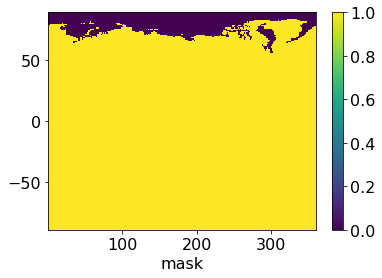

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.151374355047994 0.4238304330779959 0.49058738570234095
 0.999794176906717 0.892355595790529 0.9213599359162353 1.0207664551256586
 0.8747441001804579 0.5363398829497007 1.2422128870196831
 1.4097082500522518 1.7065594631393497]
1 [1.1944898157266088 0.8756669630170621 0.9115738729374916
 1.1003538306487246 1.1279562037615003 1.4127893282020931
 1.2120956888264234 1.0270952625604148 0.7412756628724727
 1.2572544452126637 2.0800841971634894 2.0096002821047936]
2 [1.3782043786552627 0.8903415692646065 0.8422589297316239
 1.1683220304446351 1.393563403522892 1.3997199083637288
 1.4723193503768692 0.7750343747424903 0.9740641180288493
 1.1205965759933136 1.80438562050136 1.9588801853427285]
3 [1.291785441694708 0.8576470520792747 0.7643427085010742
 0.9810222161578445 1.1126908029542706 1.1985336354426603
 1.1354067750580228 0.8583350675215273 0.716909086929585
 1.3527763689231067 1.6914980548776735 1.80794

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


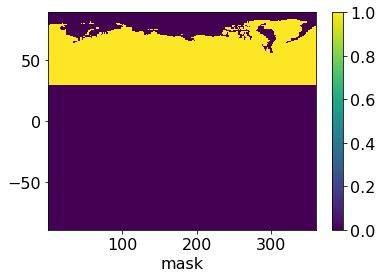

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [2.037491686422834 1.8748434529992444 1.7560299015299698 1.681322702856455
 1.1285141253707327 0.4248137961058209 -0.19011910598686446
 -0.532484721336212 -0.46390315383325764 0.22591904702124427
 0.9199509803034651 1.6487419649641917]
1 [1.972360769350871 1.9730896959640107 2.019523411065183 1.7229281736752329
 1.1304076626789028 0.579259427782868 -0.133710602248321
 -0.49130158700178744 -0.4144896560185127 0.33395802929735363
 1.2098543556933723 1.799770423007772]
2 [1.842990203798568 1.912098088082122 1.8181560127216183 1.6280893265438283
 1.2276106619806149 0.5459913914924239 -0.150109989700587
 -0.5540173647469319 -0.363699246834263 0.17261690285428943
 1.1144310660664654 1.758221874604951]
3 [1.9691103974477315 2.025528889192759 1.8933021407394335
 1.6634743683841324 1.2253052928168964 0.46084678894678405
 -0.21050184747861495 -0.515739739330275 -0.3635587969110002
 0.25073960877196366 1.0031561916424

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


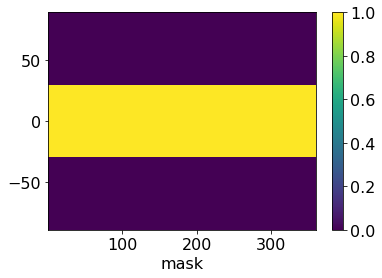

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.7046732325639345 -0.8925070462511698 -0.7900459601427068
 -0.8008072197360859 -0.9370219935397028 -0.8134484994951444
 -0.450407715497678 -0.31763009246708857 -0.4275227108883681
 -0.4964502007576983 -0.637868198423856 -0.5831958203274393]
1 [-0.6353603702497093 -0.5441100112447683 -0.6379285847245176
 -0.6975329856235886 -0.6629009808649337 -0.40180643269836175
 -0.26536627325717 -0.19769356388008677 -0.29759576392241993
 -0.5085941467883975 -0.4653111506662507 -0.5114181194252387]
2 [-0.4161376456661443 -0.45927892876116855 -0.509218538607639
 -0.5185127991285436 -0.6280195426675269 -0.42589562796885927
 -0.14390086123618223 -0.18994831637839057 -0.21120986293084007
 -0.4160323348521475 -0.5332654441412015 -0.45634735850531977]
3 [-0.4840022069666689 -0.5900094392157063 -0.6426754325334908
 -0.6059526273051975 -0.6505389133446272 -0.5659216119095241
 -0.2748190511311153 -0.22909161068876702 -0.4432727760375

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


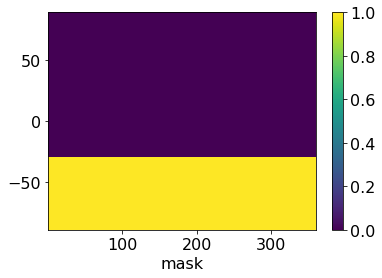

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.18144409881090498 -0.5585059736700794 -0.47539655568492234
 0.1192786937863482 0.7008634639594991 1.309994639305559
 1.6612932766102013 1.7248589139837587 1.427765747671326 1.512744040756137
 1.1276254681726425 0.6410133185025972]
1 [-0.14251058337455316 -0.5533127217021804 -0.4700209534031739
 0.07495864259708007 0.6604495219475313 1.235336333117587
 1.6111725643319144 1.7160904134422894 1.453361082813405
 1.4318905627037077 1.335540992136368 0.7212479785222607]
2 [-0.04864817947716072 -0.5624775900563473 -0.4666785443823559
 0.058745503029350436 0.7939722842098045 1.2796241448401642
 1.7663302013136384 1.519000055867813 1.5489732277939523
 1.3640120079911717 1.223219998576096 0.6570056692430978]
3 [-0.19332274878635447 -0.5778723978977772 -0.48628399970486846
 -0.07649952492109056 0.5379244234820015 1.3036084584054 1.620727673667753
 1.6031664175405693 1.5237406598781698 1.4935505268897058
 1.20861043107606

shape(reg_arcT) (744, 180, 360)
region glo_noArc
shape(mask) (744, 180, 360)


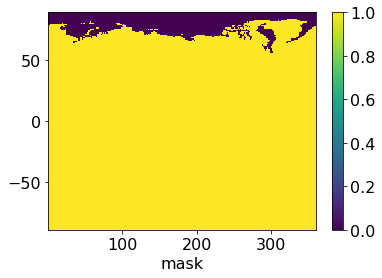

glo_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [1.3569769184494218 0.4995144389847808 0.5781922760063304
 1.1783288513543453 1.0517048093245525 1.0858884959012773
 1.2030461792552407 1.030948403784111 0.6321148620478616
 1.4640366168446266 1.661441866133011 2.011302224414233]
1 [1.407791568534932 1.0320360635558232 1.0743549216763297 1.296845586121711
 1.329376954433197 1.6650731368096099 1.4285413475454274
 1.2105051308747747 0.8736463169568428 1.4817641675720679
 2.4515278037998267 2.368457475337793]
2 [1.6243123034151317 1.0493311352047143 0.992662310040842
 1.3769509644526055 1.6424140112948373 1.6496698920001087
 1.7352335200870241 0.9134333702322212 1.1480041391054292
 1.3207031074206912 2.1265973384480317 2.308680218439644]
3 [1.5224614134259062 1.0107983113791457 0.900832477876266
 1.1562047547574597 1.3113855891961048 1.4125574989145637
 1.3381579848898129 1.0116091867218004 0.8449285667384396
 1.5943435776593755 1.9935512789629721 2.13079513

shape(reg_arcT) (744, 180, 360)
region N_noArc
shape(mask) (744, 180, 360)


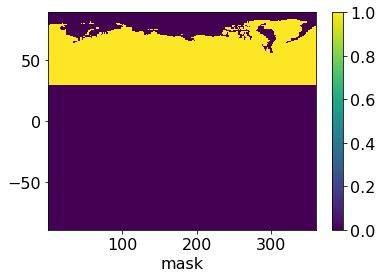

N_noArc
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [2.4013294875697686 2.2096369267491096 2.0696066696603217
 1.9815588997951075 1.330034504901221 0.500673402553289
 -0.22406894634166175 -0.6275712787176785 -0.5467430027320536
 0.2662617339893236 1.0842279410719413 1.9431601729935113]
1 [2.324568049592098 2.3254271416718697 2.3801525916125374
 2.0305939189743816 1.332266173871564 0.6826986113155229
 -0.1575874955069497 -0.5790340132521066 -0.4885056660218185
 0.39359339167188107 1.4258997763529029 2.1211579985448736]
2 [2.172095597334027 2.2535441752396443 2.14282672927905 1.9188195634266547
 1.4468268516200102 0.643489854258928 -0.17691534500426323
 -0.6529490370231698 -0.4286455409118099 0.2034413497925554
 1.3134366135783342 2.072190066498692]
3 [2.3207372541348263 2.3872304765486083 2.2313918087286178
 1.9605233627384422 1.4441098093913423 0.5431408584015669
 -0.2480914630997962 -0.6078361213535384 -0.42848001064510727
 0.29551453890981433 1.18229122586

shape(reg_arcT) (744, 180, 360)
region T
shape(mask) (744, 180, 360)


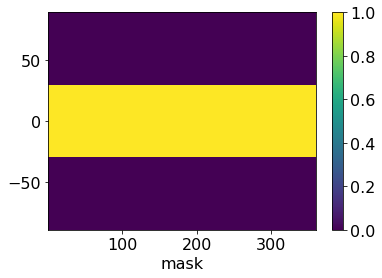

T
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.8305077383789229 -1.051883304510307 -0.9311255958824758
 -0.9438085089746727 -1.1043473495289355 -0.9587071601192774
 -0.530837664693692 -0.37434975183621155 -0.5038660521184337
 -0.5851020223215729 -0.7517732338566875 -0.6873379311001964]
1 [-0.7488175792228715 -0.6412725132527627 -0.7518444034253242
 -0.8220924473420868 -0.7812761560193859 -0.47355758139449783
 -0.31275310776737897 -0.23299598600153093 -0.350737864622852
 -0.5994145301434686 -0.5484024275709382 -0.6027427836083171]
2 [-0.4904479395350987 -0.5412930231828059 -0.6001504205018602
 -0.6111043704014979 -0.7401658895724426 -0.5019484186775841
 -0.16959744359978612 -0.22386765858881746 -0.24892590988277566
 -0.4903238232186025 -0.6284914163092732 -0.5378379582384126]
3 [-0.5704311724964312 -0.6953682676470826 -0.7574389026287571
 -0.714158453609697 -0.7667065764418821 -0.6669790426076532
 -0.32389388169024297 -0.27000082688318955 -0.52242862890143

shape(reg_arcT) (744, 180, 360)
region S
shape(mask) (744, 180, 360)


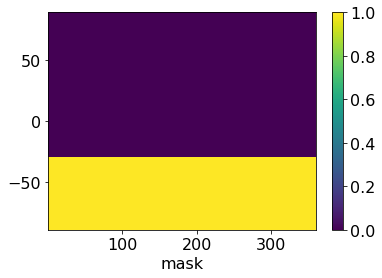

S
(744, 180, 360)
(744, 180, 360)
(744, 180, 360)
True
False
True
False
0 [-0.2138448307414237 -0.6582391832540221 -0.5602887977715156
 0.14057846053391035 0.8260176539522667 1.5439222534672659
 1.9579527902905944 2.0328694343380014 1.6827239168983483
 1.782876905176876 1.3289871589177573 0.7554799825209182]
1 [-0.1679589018342948 -0.652118564863284 -0.5539532665108836
 0.08834411448941581 0.778386936581019 1.4559321068885847
 1.898881950819756 2.022535130128412 1.7128898476015133 1.6875853060436556
 1.574030455017862 0.8500422604012361]
2 [-0.057335354383796555 -0.6629200168521238 -0.5500139987363479
 0.06923577142744873 0.9357530492472695 1.508128456418765
 2.0817463086910735 1.7902500658442084 1.8255755899000152
 1.607585580846738 1.4416521411789704 0.7743281101793652]
3 [-0.2278446682124892 -0.6810638975223804 -0.5731204282235949
 -0.09016015437128531 0.6339823562466447 1.53639568312065
 1.9101433296798518 1.889446134958528 1.7958372062849857
 1.7602559781200104 1.4244337223396524 

shape(reg_arcT) (468, 180, 360)
region glo_noArc
shape(mask) (468, 180, 360)


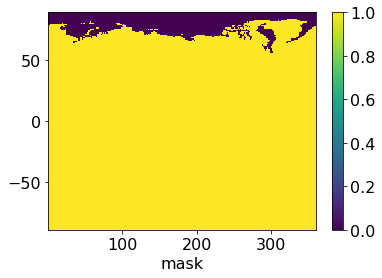

glo_noArc
(468, 180, 360)
(468, 180, 360)
(468, 180, 360)
True
False
True
False
0 [2.405139262156907 1.9046204955404271 1.9112869210999714 1.620054641538248
 1.9029832174295327 1.9957737109902318 1.9456937025981254
 1.5881727820507652 1.777898604308973 2.5727271655580446
 2.8944977787840815 2.6794824499425816]
1 [2.144915840659883 1.6659485862836214 1.5965887389482674
 1.7331289274944088 1.7157968107527386 2.054242081632953
 2.0854067615234557 1.8595375315419742 1.5586029807135788
 2.395774433008977 2.9296595525611235 2.9162955738591165]
2 [2.347822905594617 1.8544654506395535 1.849960367727661 1.692546779253092
 2.2475076479254383 2.3679407261077072 2.1839664747809695
 1.8368407938254379 1.9170787543327443 2.352752205153779 2.852583578410852
 3.136199365112275]
3 [2.622845906549206 1.9867502473119307 1.9048197012389991
 1.9867413405458565 2.2285299936016374 2.3491119655603936
 2.114757713748497 1.7436404692098262 1.2037247790794074
 2.0646007276359626 2.8667870936607307 2.663974834537

shape(reg_arcT) (468, 180, 360)
region N_noArc
shape(mask) (468, 180, 360)


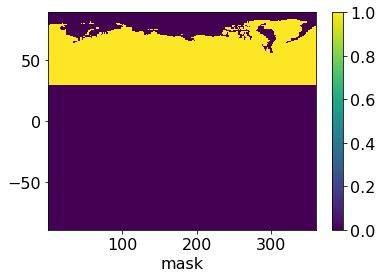

N_noArc
(468, 180, 360)
(468, 180, 360)
(468, 180, 360)
True
False
True
False
0 [2.6770270350527117 2.737454920315432 2.6892880475446024
 1.9843001746789048 1.4908407457954052 0.5519939972162942
 -0.26077077531465537 -0.7436645702582629 -0.5000648859193808
 0.47161993435812755 1.4037715995385465 2.083963415373959]
1 [2.6145174296429166 2.618328124614884 2.372329516674742 2.040507038379208
 1.4202540922344646 0.5791888700371819 -0.12869742635770656
 -0.5857195203938157 -0.39901474860842684 0.4515978253161039
 1.4436499706488555 2.1917130531009605]
2 [2.6668381466698907 2.8405188345224657 2.7252051866859106
 2.0577154943103926 1.4616321566778374 0.7267242297039666
 -0.14241505232677432 -0.6436683527039557 -0.4917627194874096
 0.4958960926911609 1.4060584181667266 2.2263713459186074]
3 [2.5634285447887435 2.6822366456451934 2.485204208613263
 2.0946223848520296 1.464460267553952 0.5550989000059641
 -0.26259178046935244 -0.7220987164539225 -0.5445309095679166
 0.3804501434715044 1.41100321

shape(reg_arcT) (468, 180, 360)
region T
shape(mask) (468, 180, 360)


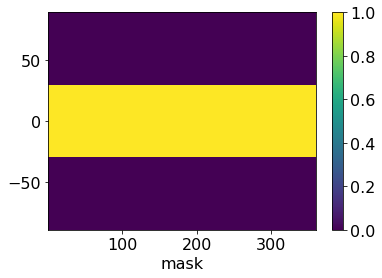

T
(468, 180, 360)
(468, 180, 360)
(468, 180, 360)
True
False
True
False
0 [-0.19865192823905786 -0.21547047763018212 -0.30527810346616946
 -0.48678663786323906 -0.4572416693063564 -0.23037571204953858
 0.07350841175430124 0.13790585452785065 -0.04131770832395574
 -0.16752589187818345 -0.2630378159641168 -0.23251573799049494]
1 [-0.2374230142447751 -0.2677346912827999 -0.30098459959126217
 -0.2772820740325662 -0.3367679091593629 -0.1505811157839025
 0.13839759148401176 0.38298687696759687 0.1472603087804704
 -0.11383486077571256 -0.23147823764491804 -0.17251722745074236]
2 [-0.17819520570631714 -0.26088170979385183 -0.23008685318218267
 -0.2790737386539042 -0.12283157875482871 -0.037333483097464294
 0.3991947019957736 0.5009185305682219 0.2757696744631866
 0.08637702315960988 -0.0038841218665813864 -0.026897335826290534]
3 [0.08015806652544212 -0.08802882367881487 -0.16186085645636059
 -0.27836296802487964 -0.20844994559204574 0.04329355717280365
 0.37997756062117566 0.2819217709552355 

shape(reg_arcT) (468, 180, 360)
region S
shape(mask) (468, 180, 360)


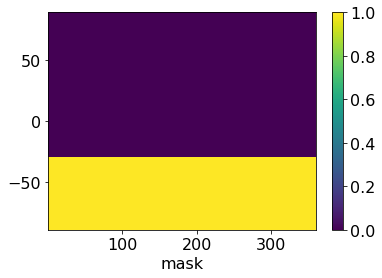

S
(468, 180, 360)
(468, 180, 360)
(468, 180, 360)
True
False
True
False
0 [-0.07323584465674716 -0.6173639471448222 -0.47272302297846186
 0.12254110472258264 0.8693841409404842 1.6741554258234763
 2.132956066158479 2.1939314977811772 2.31928119855231 2.2686331230781005
 1.753763995209652 0.8280347725591175]
1 [-0.23217857473825831 -0.6846448470484626 -0.47475617813521237
 -0.030096036852232826 0.6323106276776366 1.6256343273796738
 2.0757065963971506 2.0622701749681926 1.810357420541535
 2.0580114684685853 1.7174878195571859 0.8970997482088985]
2 [-0.1408200353689568 -0.7251716740890614 -0.6451579657760664
 -0.08609497640339635 0.9087070700024297 1.6785499795012049
 1.9271868251119706 1.9795906159611711 2.133071799356968 1.770479089303008
 1.4504092821107069 0.9367253550199582]
3 [-0.020740704764979738 -0.6074575746544475 -0.4185236509179032
 0.1704819237187065 0.9725196716397313 1.7507195083816258
 1.997371933596674 2.1838174147085128 1.7844467195894829 1.835214809433744
 1.6835738115

In [6]:
# some model analysis:
# 1) recalculate CO2 flux from spco2 
# 2) same with scaling
# 3) model run with higher piston transfer velocity

# model :
# pco2

in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/from_cara/spco2_fesom_A_reg_1958_2019.nc',mode='r')

spco2_fesom = in_data['spco2'][:]
fesom_lon = in_data['Lon'][:]
fesom_lat = in_data['Lat'][:]
fesom_time = in_data['Time'][:]

# check whether it starts at 0 deg:
print(min(fesom_lon),min(fesom_time),np.shape(spco2_fesom))

# again trouble with negative numbers (ha, no data types trouble this time)
ftest = np.copy(spco2_fesom.data)
ftest[ftest<0]=np.nan

# then model sos, tos, kw660, aCO2:
in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/from_cara/Kw_fesom_A_reg_1958_2019.nc',mode='r')
kw660 = in_data['Kw'][:]

in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/from_cara/sos_fesom_A_reg_1958_2019.nc',mode='r')
sos = in_data['sos'][:]

in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/from_cara/tos_fesom_A_reg_1958_2019.nc',mode='r')
tos = in_data['tos'][:]

in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/from_cara/pco2atm_fesom_A_reg_1958_2019.nc',mode='r')
pco2atm = in_data['pco2atm'][:]


in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/from_cara/alphaCO2_fesom_A_1_gr_1958-2019_v20220502.nc',mode='r')
alpha = in_data['alphaCO2'][:]


#------------------------------------------------------------------------------------
# calculate density and Schmidt number:

#------------------------------------------------------------------------------------
# for Schmidt number, taken from Luke; same is used in mocsy
#!  Compute Schmidt number of CO2 in seawater w/ formulation from Wanninkhof (Limnol. Oceanogr.: Methods 12, 2014, 351–362)                                             

a = +2116.8
b = -136.25
c = +4.7353
d = -0.092307
e = +0.0007555

rhosw = sw.dens0(sos,tos)
Sc = a + b * tos + c * tos ** 2 + d * tos ** 3 + e * tos ** 4

# include Schmidt number in kw value
kwco2 = kw660 * (660/Sc)**0.5
#------------------------------------------------------------------------------------

# 1) calculate gas-ex from model fields
#-------------------

# units: 

# kw: m / s
# alpha: mol / kg / atm
# rhosw: kg / m3
# dpco2: muatm

# 1 /s * mol /m2 /atm * muatm 


# for mol / m2/yr
conv_molm2yr = -1e-6*24*365*60*60

# for mol / m2/s
conv_molm2s = -1e-6 # uptake positive

# kwco2 now includes Schmidt number
gasex_fesom = kwco2 * alpha * rhosw * (spco2_fesom - pco2atm) *conv_molm2s


#------------------------------------------------------------------------------------


# 2) scale kwco2 and recalculate gas-ex

# kwco2 now includes Schmidt number
gasex_fesom_165 = kwco2*16.5/14.0 * alpha * rhosw * (spco2_fesom - pco2atm) *conv_molm2s

# kwco2 in fesom-recom standard sim is 14.0 (kw660 is 15.5)

#------------------------------------------------------------------------------------

# 3) load model run with higher a value

in_data = Dataset('/work/ollie/jhauck/subsampling/fesom/a031/fgco2_fesom_A_reg_1981_2019.nc',mode='r')

gasex_fesom_a031 = -1*in_data['fgco2'][:]  # change sign

# integrate time-series:

# 1) recalculated from pCO2
fesom_glo_noArc= integrate_CO2flux(gasex_fesom,'glo_noArc',areaT,xax,yax)
fesom_N_noArc= integrate_CO2flux(gasex_fesom,'N_noArc',areaT,xax,yax)
fesom_T= integrate_CO2flux(gasex_fesom,'T',areaT,xax,yax)
fesom_S= integrate_CO2flux(gasex_fesom,'S',areaT,xax,yax)


# 2) scaled
fesom_glo_noArc_165= integrate_CO2flux(gasex_fesom_165,'glo_noArc',areaT,xax,yax)
fesom_N_noArc_165= integrate_CO2flux(gasex_fesom_165,'N_noArc',areaT,xax,yax)
fesom_T_165= integrate_CO2flux(gasex_fesom_165,'T',areaT,xax,yax)
fesom_S_165= integrate_CO2flux(gasex_fesom_165,'S',areaT,xax,yax)


# 3) a=0.31
fesom_glo_noArc_a031= integrate_CO2flux(gasex_fesom_a031,'glo_noArc',areaT2,xax,yax)
fesom_N_noArc_a031= integrate_CO2flux(gasex_fesom_a031,'N_noArc',areaT2,xax,yax)
fesom_T_a031= integrate_CO2flux(gasex_fesom_a031,'T',areaT2,xax,yax)
fesom_S_a031= integrate_CO2flux(gasex_fesom_a031,'S',areaT2,xax,yax)

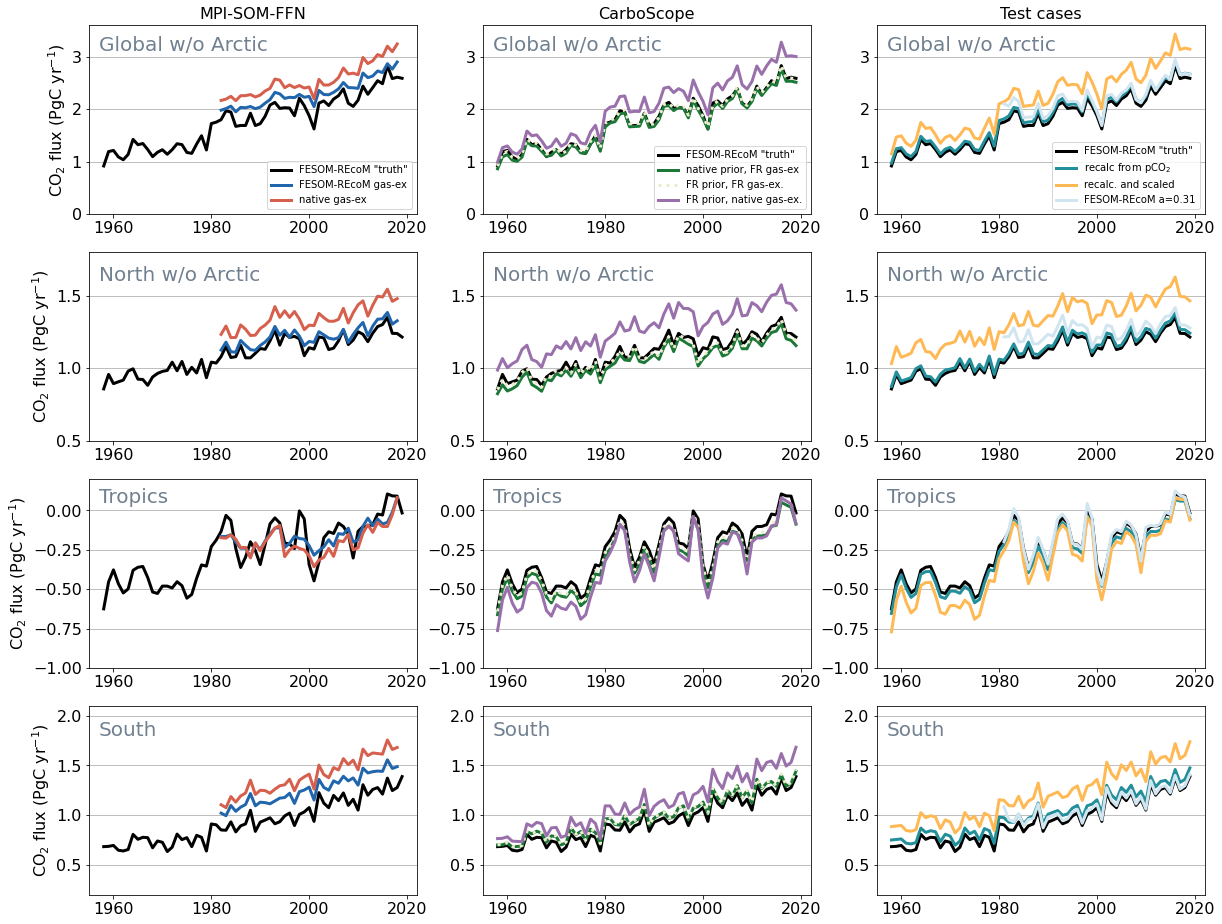

In [7]:
# plot

# first do mpi-som-ffn and carboscope with fesom vs native gas-ex, for carboscope also with ocim prior



# now plot both products together with the known truth:
truth_glo_noArc= np.load('fesom_fgco2_1x1_glonoArc_subsampling.npy')
truth_N_noArc= np.load('fesom_fgco2_1x1_NnoArc_subsampling.npy')
truth_T= np.load('fesom_fgco2_1x1_T_subsampling.npy')
truth_S= np.load('fesom_fgco2_1x1_S_subsampling.npy')


fig,ax = plt.subplots(4,3,figsize=(20,16))
#plt.figure(figsize=(8,8))


# global
ax1 = plt.subplot(4,3,1)
plt.plot(gcb_years,truth_glo_noArc,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
#plt.plot(gcb_years,fesom_glo_noArc,color='salmon',linestyle='solid',linewidth='3',label='FESOM-REcoM recalc.')
plt.plot(gcb_years,land_fgco2_PgCyr_C_fesomkw_glo_noArc,color='#2166AC',linestyle='solid',linewidth='3',label='FESOM-REcoM gas-ex')
plt.plot(gcb_years,land_fgco2_PgCyr_C_nativekw_glo_noArc,color='#D6604D',linestyle='solid',linewidth='3',label='native gas-ex')

plt.legend(loc='lower right',fontsize=10)
plt.ylim(0,3.6) 
plt.title('MPI-SOM-FFN', fontsize=16)#Global without Arctic')
plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.text(1957,3.1,'Global w/o Arctic',fontsize=20,color='slategrey')
plt.grid(b=None, which='major', axis='y')

# N-noArc
ax1 = plt.subplot(4,3,4)
plt.plot(gcb_years,truth_N_noArc,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
#plt.plot(gcb_years,fesom_glo_noArc,color='salmon',linestyle='solid',linewidth='3',label='FESOM-REcoM recalc.')
plt.plot(gcb_years,land_fgco2_PgCyr_C_fesomkw_N_noArc,color='#2166AC',linestyle='solid',linewidth='3',label='model gas-ex')
plt.plot(gcb_years,land_fgco2_PgCyr_C_nativekw_N_noArc,color='#D6604D',linestyle='solid',linewidth='3',label='native gas-ex')

#plt.legend()
plt.text(1957,1.6,'North w/o Arctic',fontsize=20,color='slategrey')
plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(0.5,1.8) 
plt.grid(b=None, which='major', axis='y')

# T
ax1 = plt.subplot(4,3,7)
plt.plot(gcb_years,truth_T,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
#plt.plot(gcb_years,fesom_glo_noArc,color='salmon',linestyle='solid',linewidth='3',label='FESOM-REcoM recalc.')
plt.plot(gcb_years,land_fgco2_PgCyr_C_fesomkw_T,color='#2166AC',linestyle='solid',linewidth='3',label='model gas-ex')
plt.plot(gcb_years,land_fgco2_PgCyr_C_nativekw_T,color='#D6604D',linestyle='solid',linewidth='3',label='native gas-ex')

plt.text(1957,0.05,'Tropics',fontsize=20,color='slategrey')
plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(-1.0,0.2) 
plt.grid(b=None, which='major', axis='y')

# S
ax1 = plt.subplot(4,3,10)
plt.plot(gcb_years,truth_S,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
#plt.plot(gcb_years,fesom_glo_noArc,color='salmon',linestyle='solid',linewidth='3',label='FESOM-REcoM recalc.')
plt.plot(gcb_years,land_fgco2_PgCyr_C_fesomkw_S,color='#2166AC',linestyle='solid',linewidth='3',label='model gas-ex')
plt.plot(gcb_years,land_fgco2_PgCyr_C_nativekw_S,color='#D6604D',linestyle='solid',linewidth='3',label='native gas-ex')

plt.text(1957,1.8,'South',fontsize=20,color='slategrey')
plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(0.2,2.1) 
plt.grid(b=None, which='major', axis='y')

#-------------------------------------------------
# Rödenbeck
ax1 = plt.subplot(4,3,2)
plt.plot(gcb_years,truth_glo_noArc,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_ocimprior_fesomkw_glo_noArc,color='#1B7837',linestyle='solid',linewidth='3',label='native prior, FR gas-ex')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_fesomkw_glo_noArc,color='#EAECCC',linestyle='dotted',linewidth='3',label='FR prior, FR gas-ex.')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_nativekw_glo_noArc,color='#9970AB',linestyle='solid',linewidth='3',label='FR prior, native gas-ex.')

plt.legend(loc='lower right',fontsize=10)
plt.ylim(0,3.6) 
plt.title('CarboScope', fontsize=16)#Global without Arctic')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.text(1957,3.1,'Global w/o Arctic',fontsize=20,color='slategrey')
plt.grid(b=None, which='major', axis='y')

# N-noArc
ax1 = plt.subplot(4,3,5)
plt.plot(gcb_years,truth_N_noArc,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_ocimprior_fesomkw_N_noArc,color='#1B7837',linestyle='solid',linewidth='3',label='native prior, FESOM-REcoM gas-ex')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_fesomkw_N_noArc,color='#EAECCC',linestyle='dotted',linewidth='3',label='FESOM-REcoM prior, FESOM-REcoM gas-ex.')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_nativekw_N_noArc,color='#9970AB',linestyle='solid',linewidth='3',label='FESOM-REcoM prior, native gas-ex.')

#plt.legend()
plt.text(1957,1.6,'North w/o Arctic',fontsize=20,color='slategrey')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(0.5,1.8) 
plt.grid(b=None, which='major', axis='y')

# T
ax1 = plt.subplot(4,3,8)
plt.plot(gcb_years,truth_T,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_ocimprior_fesomkw_T,color='#1B7837',linestyle='solid',linewidth='3',label='native prior model gas-ex')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_fesomkw_T,color='#EAECCC',linestyle='dotted',linewidth='3',label='model prior model gas-ex.')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_nativekw_T,color='#9970AB',linestyle='solid',linewidth='3',label='model prior native gas-ex.')

plt.text(1957,0.05,'Tropics',fontsize=20,color='slategrey')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(-1.0,0.2) 
plt.grid(b=None, which='major', axis='y')

# S
ax1 = plt.subplot(4,3,11)
plt.plot(gcb_years,truth_S,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_ocimprior_fesomkw_S,color='#1B7837',linestyle='solid',linewidth='3',label='native prior model gas-ex')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_fesomkw_S,color='#EAECCC',linestyle='dotted',linewidth='3',label='model prior model gas-ex.')
plt.plot(gcb_years,roeden_fgco2_PgCyr_C_fesomprior_nativekw_S,color='#9970AB',linestyle='solid',linewidth='3',label='model prior native gas-ex.')

plt.text(1957,1.8,'South',fontsize=20,color='slategrey')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(0.2,2.1) 
plt.grid(b=None, which='major', axis='y')

#-------------------------------------------------
# model-based exercises

ax1 = plt.subplot(4,3,3)
plt.plot(gcb_years,truth_glo_noArc,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,fesom_glo_noArc,color='#238F9B',linestyle='solid',linewidth='3',label='recalc from pCO$_2$')
plt.plot(gcb_years,fesom_glo_noArc_165,color='#FFB954',linestyle='solid',linewidth='3',label='recalc. and scaled')
plt.plot(gcb_years2,fesom_glo_noArc_a031,color='#D1E5F0',linestyle='solid',linewidth='3',label='FESOM-REcoM a=0.31')

plt.legend(loc='lower right',fontsize=10)
plt.ylim(0,3.6) 
plt.title('Test cases', fontsize=16)#Global without Arctic')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.text(1957,3.1,'Global w/o Arctic',fontsize=20,color='slategrey')
plt.grid(b=None, which='major', axis='y')

# N-noArc
ax1 = plt.subplot(4,3,6)
plt.plot(gcb_years,truth_N_noArc,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,fesom_N_noArc,color='#238F9B',linestyle='solid',linewidth='3',label='recalc from pCO2')
plt.plot(gcb_years,fesom_N_noArc_165,color='#FFB954',linestyle='solid',linewidth='3',label='recalc. and scaled')
plt.plot(gcb_years2,fesom_N_noArc_a031,color='#D1E5F0',linestyle='solid',linewidth='3',label='FESOM-REcoM a=0.31')

#plt.legend()
plt.text(1957,1.6,'North w/o Arctic',fontsize=20,color='slategrey')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(0.5,1.8) 
plt.grid(b=None, which='major', axis='y')

# T
ax1 = plt.subplot(4,3,9)
plt.plot(gcb_years,truth_T,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,fesom_T,color='#238F9B',linestyle='solid',linewidth='3',label='recalc from pCO2')
plt.plot(gcb_years,fesom_T_165,color='#FFB954',linestyle='solid',linewidth='3',label='recalc. and scaled')
plt.plot(gcb_years2,fesom_T_a031,color='#D1E5F0',linestyle='solid',linewidth='3',label='FESOM-REcoM a=0.31')

plt.text(1957,0.05,'Tropics',fontsize=20,color='slategrey')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(-1.0,0.2) 
plt.grid(b=None, which='major', axis='y')

# S
ax1 = plt.subplot(4,3,12)
plt.plot(gcb_years,truth_S,color='black',linestyle='solid',linewidth='3',label='FESOM-REcoM "truth"')
plt.plot(gcb_years,fesom_S,color='#238F9B',linestyle='solid',linewidth='3',label='recalc from pCO2')
plt.plot(gcb_years,fesom_S_165,color='#FFB954',linestyle='solid',linewidth='3',label='recalc. and scaled')
plt.plot(gcb_years2,fesom_S_a031,color='#D1E5F0',linestyle='solid',linewidth='3',label='FESOM-REcoM a=0.31')

plt.text(1957,1.8,'South',fontsize=20,color='slategrey')
#plt.ylabel('CO$_2$ flux (PgC yr$^{-1}$)')
plt.ylim(0.2,2.1) 
plt.grid(b=None, which='major', axis='y')




plt.savefig('subsampling_model_vs_native_kw_and_prior.png',dpi=300,facecolor='w',transparent=False)
plt.savefig('subsampling_model_vs_native_kw_and_prior.pdf',dpi=300,facecolor='w',transparent=False)

plt.show()





In [8]:
print(fesom_S_a031)

[1.08327988 0.95476688 0.93228961 1.01089667 0.89407728 0.95643062
 0.96768177 1.11337507 0.87199629 0.97924627 0.99489078 1.01690719
 0.94440727 0.96426749 1.03228162 1.05794325 0.91906206 1.04398226
 1.06815834 1.1120178  0.95404083 1.27762758 1.14832365 1.0961698
 1.23156194 1.17266035 1.24776131 1.11251463 1.18446556 1.06091468
 1.34725279 1.21341416 1.28156946 1.29646911 1.22476518 1.40003032
 1.26113221 1.29701109 1.40999301]


In [9]:
# difference between known-truth and native gasex
# MPI-SOM-FFN
print('global, Land')
print(truth_glo_noArc-land_fgco2_PgCyr_C_nativekw_glo_noArc)
print('North, Land')
print(truth_N_noArc-land_fgco2_PgCyr_C_nativekw_N_noArc)
print('T, Land')
print(truth_T-land_fgco2_PgCyr_C_nativekw_T)
print('S, Land')
print(truth_S-land_fgco2_PgCyr_C_nativekw_S)

# CarboScope
print('global, Röden')
print(truth_glo_noArc-roeden_fgco2_PgCyr_C_fesomprior_nativekw_glo_noArc)
print('North, Röden')
print(truth_N_noArc-roeden_fgco2_PgCyr_C_fesomprior_nativekw_N_noArc)
print('T, Röden')
print(truth_T-roeden_fgco2_PgCyr_C_fesomprior_nativekw_T)
print('S, Röden')
print(truth_S-roeden_fgco2_PgCyr_C_fesomprior_nativekw_S)

global, Land
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 -0.36648522 -0.22225203 -0.29910516 -0.4896991  -0.56665248 -0.56911126
 -0.35469108 -0.54453438 -0.5447094  -0.48032453 -0.31699901 -0.44421722
 -0.53759115 -0.38030629 -0.44011395 -0.53693111 -0.24140521 -0.33538365
 -0.54696857 -0.57604423 -0.45230717 -0.30238591 -0.39070731 -0.3184458
 -0.34459343 -0.39533205 -0.556283   -0.63289872 -0.48458763 -0.54560305
 -0.58461183 -0.51069023 -0.49757999 -0.51796649 -0.37019009 -0.51337543
 -0.63232864         nan]
North, Land
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 

In [11]:
# effect of remaining sampling / metodological bias:

# difference between known-truth and FESOM gasex
# MPI-SOM-FFN
print('global, Land')
print(truth_glo_noArc-land_fgco2_PgCyr_C_fesomkw_glo_noArc)
print('North, Land')
print(truth_N_noArc-land_fgco2_PgCyr_C_fesomkw_N_noArc)
print('T, Land')
print(truth_T-land_fgco2_PgCyr_C_fesomkw_T)
print('S, Land')
print(truth_S-land_fgco2_PgCyr_C_fesomkw_S)

# CarboScope
print('global, Röden')
print(truth_glo_noArc-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_glo_noArc)
print('North, Röden')
print(truth_N_noArc-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_N_noArc)
print('T, Röden')
print(truth_T-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_T)
print('S, Röden')
print(truth_S-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_S)

global, Land
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 -0.18123324 -0.04167308 -0.11252089 -0.27745244 -0.34399469 -0.33826636
 -0.12730719 -0.32255728 -0.31473456 -0.24814334 -0.10296839 -0.19023351
 -0.27652309 -0.17712518 -0.20470602 -0.34547866 -0.07190293 -0.16063853
 -0.36827707 -0.42440111 -0.24142008 -0.12202676 -0.20433409 -0.12802654
 -0.1294755  -0.1201384  -0.29802774 -0.35391173 -0.22509866 -0.24938751
 -0.31663031 -0.22035032 -0.18487967 -0.21183456 -0.03649294 -0.18198526
 -0.28865312         nan]
North, Land
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan


In [12]:
# some numbers:
# mpi-som-ffn,fesom-recom versus native gas-exchange:
print('global')
print(land_fgco2_PgCyr_C_nativekw_glo_noArc-land_fgco2_PgCyr_C_fesomkw_glo_noArc)
print('N')
print(land_fgco2_PgCyr_C_nativekw_N_noArc-land_fgco2_PgCyr_C_fesomkw_N_noArc)
print('T')
print(land_fgco2_PgCyr_C_nativekw_T-land_fgco2_PgCyr_C_fesomkw_T)
print('S')
print(land_fgco2_PgCyr_C_nativekw_S-land_fgco2_PgCyr_C_fesomkw_S)

global
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.18525198 0.18057895 0.18658427 0.21224666 0.22265779 0.2308449
 0.22738389 0.2219771  0.22997484 0.23218119 0.21403062 0.25398371
 0.26106806 0.20318112 0.23540793 0.19145244 0.16950228 0.17474512
 0.17869149 0.15164312 0.21088709 0.18035915 0.18637323 0.19041926
 0.21511794 0.27519365 0.25825526 0.27898699 0.25948897 0.29621555
 0.26798152 0.29033992 0.31270032 0.30613193 0.33369715 0.33139017
 0.34367552        nan]
N
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.10780971 0.11107465 0.09698

In [13]:
# some numbers:
# carboscope,fesom-recom versus native gas-exchange:
print('global')
print(roeden_fgco2_PgCyr_C_fesomprior_nativekw_glo_noArc-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_glo_noArc)
print('N')
print(roeden_fgco2_PgCyr_C_fesomprior_nativekw_N_noArc-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_N_noArc)
print('T')
print(roeden_fgco2_PgCyr_C_fesomprior_nativekw_T-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_T)
print('S')
print(roeden_fgco2_PgCyr_C_fesomprior_nativekw_S-roeden_fgco2_PgCyr_C_fesomprior_fesomkw_S)

global
[0.07426533 0.11448076 0.10407663 0.10200367 0.0870593  0.09927277
 0.14925431 0.14062169 0.16114933 0.14653396 0.11018552 0.12052114
 0.16052342 0.14969441 0.14850448 0.17855448 0.17726008 0.14146667
 0.13632148 0.17715754 0.19126956 0.1252171  0.22845429 0.24413912
 0.23762124 0.27674244 0.26625471 0.22601827 0.23378083 0.22553257
 0.27805865 0.23856098 0.23042105 0.27520931 0.31109944 0.3092043
 0.29482224 0.31218506 0.27447045 0.27537272 0.32989209 0.31263713
 0.2846119  0.2305483  0.33130192 0.33677227 0.31223996 0.3525955
 0.35094094 0.39227439 0.32386837 0.31139238 0.33063988 0.39193752
 0.35332912 0.3945375  0.41605739 0.38803972 0.44393716 0.41751161
 0.42511705 0.42210476]
N
[0.13439438 0.14381746 0.12369974 0.14272847 0.13811667 0.15732863
 0.15418049 0.14532574 0.14906038 0.13765368 0.15096031 0.1516345
 0.16515966 0.16839583 0.17826724 0.16679634 0.18322111 0.16483498
 0.17177826 0.16863908 0.18182178 0.14823715 0.16773104 0.16951734
 0.17873249 0.1993078  0.1731186

In [14]:
print(0.42210476/0.07426533)

5.683739101408423


In [15]:
# print some numbers for test cases, fesom recom truth versus recalculated
print('global')
print(truth_glo_noArc-fesom_glo_noArc)
print('N')
print(truth_N_noArc-fesom_N_noArc)
print('T')
print(truth_T-fesom_T)
print('S')
print(truth_S-fesom_S)

global
[-0.05554195 -0.05496029 -0.05210679 -0.05864986 -0.06005405 -0.05726207
 -0.05841027 -0.06275033 -0.05325854 -0.05085455 -0.05064231 -0.06016481
 -0.04572108 -0.04951514 -0.05243172 -0.04862906 -0.04500808 -0.05524295
 -0.05595422 -0.05493415 -0.05952502 -0.07146936 -0.0593323  -0.06190056
 -0.0721718  -0.06471087 -0.06754405 -0.06770182 -0.06623471 -0.07527208
 -0.06612403 -0.07070273 -0.06670807 -0.07223087 -0.06271443 -0.07615309
 -0.06714422 -0.07032678 -0.06929257 -0.07159714 -0.0795555  -0.0697971
 -0.06588485 -0.07954892 -0.06817443 -0.07133103 -0.07070851 -0.06690546
 -0.07197238 -0.0652878  -0.07134788 -0.07127474 -0.0740466  -0.08161005
 -0.07389914 -0.06484067 -0.06441088 -0.0826918  -0.07989307 -0.0771244
 -0.07538332 -0.07803554]
N
[-0.01772483 -0.01704473 -0.018217   -0.01653763 -0.01742526 -0.01697889
 -0.02006458 -0.02129572 -0.01877339 -0.02274491 -0.01903294 -0.02373028
 -0.01547881 -0.01846818 -0.02417458 -0.01846376 -0.01662226 -0.01970461
 -0.02082722 -0.01

In [16]:
# scaling effect:
# print some numbers for test cases,
print('global')
print(fesom_glo_noArc-fesom_glo_noArc_165)
print('N')
print(fesom_N_noArc-fesom_N_noArc_165)
print('T')
print(fesom_T-fesom_T_165)
print('S')
print(fesom_S-fesom_S_165)


global
[-0.17365525 -0.22247374 -0.22585849 -0.20489426 -0.19555575 -0.21318975
 -0.26456594 -0.24720507 -0.24960741 -0.22877411 -0.20444467 -0.2210418
 -0.22702282 -0.21230334 -0.22860068 -0.24800663 -0.24438003 -0.21953847
 -0.21651724 -0.24811279 -0.27710737 -0.23079703 -0.31843689 -0.32372731
 -0.33397635 -0.36283656 -0.35907632 -0.31040631 -0.31325892 -0.31470698
 -0.35492328 -0.3136087  -0.31947239 -0.34584973 -0.38205884 -0.39358713
 -0.37148359 -0.37433145 -0.3730462  -0.34710914 -0.40830734 -0.38110977
 -0.34634732 -0.30373697 -0.38962381 -0.39761682 -0.38184872 -0.40318861
 -0.41539222 -0.4376999  -0.38976476 -0.37901051 -0.40056534 -0.44976067
 -0.4206121  -0.44173116 -0.46519013 -0.45810961 -0.51911707 -0.47440539
 -0.47907939 -0.47573692]
N
[-0.15641549 -0.1741317  -0.16298183 -0.16490388 -0.16717105 -0.17812951
 -0.18155334 -0.16901756 -0.16815272 -0.16170129 -0.17128366 -0.17648895
 -0.17752171 -0.17926553 -0.19040784 -0.17882552 -0.18993616 -0.17449127
 -0.18344307 -0.1

In [14]:
# fesom-recom sensitivity to higher coefficient a

# print some numbers for test cases,
print('global')
print(truth_glo_noArc[gcb_years>1980]-fesom_glo_noArc_a031)
print('N')
print(truth_N_noArc[gcb_years>1980]-fesom_N_noArc_a031)
print('T')
print(truth_T[gcb_years>1980]-fesom_T_a031)
print('S')
print(truth_S[gcb_years>1980]-fesom_S_a031)

global
[-0.34888853 -0.25656237 -0.2527982  -0.20140707 -0.16283684 -0.15975832
 -0.16517101 -0.18842745 -0.13610627 -0.14959533 -0.15213088 -0.17502559
 -0.15766771 -0.1218985  -0.12426787 -0.11825727 -0.10080763 -0.15512158
 -0.0969656  -0.07550677 -0.06441756 -0.13997689 -0.12424438 -0.10137415
 -0.11309701 -0.10953239 -0.10565008 -0.06754757 -0.06860532 -0.10809737
 -0.10832583 -0.06792635 -0.09622452 -0.10203625 -0.07751313 -0.1128965
 -0.0736625  -0.07147911 -0.0728676 ]
N
[-0.17942635 -0.13743195 -0.12690519 -0.10676651 -0.10462813 -0.10771276
 -0.09516122 -0.09687646 -0.09766195 -0.0979047  -0.08969302 -0.09944936
 -0.10275496 -0.08250118 -0.08798847 -0.08493332 -0.08002097 -0.07149254
 -0.056645   -0.07341766 -0.07460186 -0.08083095 -0.07857703 -0.06550322
 -0.06948761 -0.07086416 -0.072118   -0.05864592 -0.06438309 -0.07305513
 -0.05943201 -0.05561414 -0.06551272 -0.0695126  -0.06097476 -0.06682327
 -0.05710735 -0.0586879  -0.0625988 ]
T
[ 0.01029316 -0.01579763 -0.04213818 -